In [1]:
from eodhd import APIClient
import pandas as pd

In [2]:
api_key = "5cb671b0b4a790.35526238"
api = APIClient(api_key)

In [3]:
import json
with open('../industries.json', 'r') as json_file:
    all_industries = json.load(json_file)
sector = 'Energy'
industry_list = all_industries[sector]

In [4]:
limit = 100
offset = 0
all_data = []
from urllib.parse import urlencode
import requests
base_url = "https://eodhd.com/api/screener"

for industry_name in industry_list:
    offset = 0
    while True:
        query_params = {
            'api_token': api_key,
            'sort': 'market_capitalization.desc',
            'filters': f'[["exchange","=","NYSE"],["industry","=","{industry_name}"]]',
            'limit': str(limit),
            'offset': str(offset)
        }

        encoded_params = urlencode(query_params)
        final_url = f"{base_url}?{encoded_params}"
        response = requests.get(final_url).json()
        print(response)
        data = response['data']
        if not data:
            break
        all_data.extend(data)
        offset += limit

for industry_name in industry_list:
    offset = 0
    while True:
        query_params = {
            'api_token': api_key,
            'sort': 'market_capitalization.desc',
            'filters': f'[["exchange","=","NASDAQ"],["industry","=","{industry_name}"]]',
            'limit': str(limit),
            'offset': str(offset)
        }

        encoded_params = urlencode(query_params)
        final_url = f"{base_url}?{encoded_params}"
        response = requests.get(final_url).json()
        print(response)
        data = response['data']
        if not data:
            break
        all_data.extend(data)
        offset += limit


print(len(all_data))
Hcdf = pd.DataFrame(all_data)
print(Hcdf)

{'data': [{'code': 'NE', 'name': 'Noble Corporation plc', 'last_day_data_date': '2024-06-14', 'adjusted_close': 43.02, 'refund_1d': -1.8, 'refund_1d_p': -4.02, 'refund_5d': 0.42, 'refund_5d_p': 0.99, 'exchange': 'US', 'currency_symbol': '$', 'market_capitalization': 6182330880, 'earnings_share': 3.24, 'dividend_yield': 0.0446, 'sector': 'Energy', 'industry': 'Oil & Gas Drilling', 'avgvol_1d': 1927470, 'avgvol_200d': 1199146.58}, {'code': 'RIG', 'name': 'Transocean Ltd', 'last_day_data_date': '2024-06-14', 'adjusted_close': 5.17, 'refund_1d': -0.24, 'refund_1d_p': -4.44, 'refund_5d': -0.23, 'refund_5d_p': -4.26, 'exchange': 'US', 'currency_symbol': '$', 'market_capitalization': 4433927680, 'earnings_share': -0.49, 'dividend_yield': None, 'sector': 'Energy', 'industry': 'Oil & Gas Drilling', 'avgvol_1d': 17449998, 'avgvol_200d': 16577882.28}, {'code': 'HP', 'name': 'Helmerich and Payne Inc', 'last_day_data_date': '2024-06-14', 'adjusted_close': 32.72, 'refund_1d': -1.44, 'refund_1d_p': -

In [5]:
financial_list = []
for i in range(Hcdf.size):
    try:
        code = Hcdf.loc[i]['code']
        financial = api.get_fundamentals_data(code)
        print(code)
        if financial:
            financial_list.append(financial)
    except Exception as e:
        print(f'error data for {code} : {e}')

NE
RIG
HP
SDRL
BORR
DO
PDS
NBR
ICD
SOC
COP
CNQ
EOG
OXY
HES
WDS
DVN
CTRA
EQT
TPL
MRO
OVV
PR
AR
RRC
SWN
MTDR
CIVI
MUR
SM
MGY
VRN
VIST
CNX
NOG
STR
CRK
CRC
BSM
GPOR
BTE
KOS
CRGY
TALO
VET
MNR
KRP
VTLE
SBOW
SBR
GRNT
DEC
VTS
EGY
TXO
TELL
REPX
GPRK
OBE
SD
GFR
REI
GTE
WTI
AMPY
SJT
EP
EPM
PHX
MVO
VOC
PED
CRT
BATL
NRT
PRT
PVL
CKX
INDO
BRN
CEI
MXC
MTR
HUSA
TPET
CPG
SLB
HAL
TS
FTI
NOV
TDW
VAL
LBRT
WHD
AESI
AROC
USAC
XPRO
OII
KGS
HLX
RES
SLCA
MRC
VTOL
PUMP
CLB
NR
DRQ
EFXT
NOA
TTI
SOI
OIS
NGS
RNGR
FET
FTK
NINE
SDPI
ENSV
XOM
CVX
SHEL
TTE
BP
PBR
PBR-A
EQNR
SU
E
IMO
CVE
EC
YPF
NFG
TGS
ENB
EPD
ET
WMB
OKE
KMI
MPLX
TRP
LNG
TRGP
CQP
PBA
WES
HESM
AM
DTM
ETRN
ENLC
FRO
STNG
EURN
INSW
KNTK
TNK
EE
DHT
LPG
NGL-PB
NGL-PC
GEL
GLP
FLNG
NVGS
GLOP-PA
GLOP-PB
GLOP-PC
TNP
TK
NGL
OSG
CLCO
PBT
TNP-PE
TNP-PF
SMLP
DLNG
DLNG-PB
BPT
GLP-PB
SEAL-PA
SEAL-PB
ET-PI
MPC
PSX
VLO
DINO
SUN
PBF
VVV
UGP
CSAN
CVI
DKL
DK
WKC
PARR
CAPL
SGU
AE
BTU
CEIX
NRP
NC
CCJ
NXE
UEC
DNN
UUUU
EU
LEU
URG
PTEN
FANG
CHK
APA
CHRD
CHKEL
CHKEW
CHKEZ
NEXT
HPK

In [6]:
def get_price(code):
    date = '2024-03-28'
    price = api.get_eod_historical_stock_market_data(symbol=code + '.US', from_date=date, to_date=date)
    if not price:
        price = api.get_eod_historical_stock_market_data(symbol=code + '.US', from_date='2024-04-01', to_date='2024-04-01')
    if not price:
        price = api.get_eod_historical_stock_market_data(symbol=code + '.US', from_date='2024-04-02', to_date='2024-04-02')
    return price

In [7]:
def get_debt(stock):
    debt1 = None
    debt2 = None
    report = stock['Financials']['Balance_Sheet']['quarterly']
    for key in report:
        debt1 = report[key].get('longTermDebtTotal')
        debt2 = report[key].get('longTermDebt')
        if debt1 and debt2:
            return float(max(debt1, debt2))
        if debt1:
            return float(debt1)
        if debt2:
            return float(debt2)

In [8]:
def get_ebitda(stock):
    ebitda = None
    sum = 0
    cout = 0
    report = stock['Financials']['Income_Statement']['quarterly']
    for key in report:
        ebitda = report[key].get('ebitda')
        if ebitda:
            sum = sum + float(ebitda)
            cout = cout + 1
            if cout == 4:
                return sum


In [9]:
def get_shares(stock):
    share = float(stock['SharesStats']['SharesOutstanding'])
    return share
def get_FCF(stock):
    report = stock['Financials']['Cash_Flow']['quarterly']
    sum = 0
    cout = 0
    for key in report:
        FCF = report[key].get('freeCashFlow')
        if FCF:
            cout = cout + 1
            sum = sum + float(FCF)
            if cout == 4 :
                return sum

In [10]:
def get_EPS(stock):
    earningHistory = stock['Earnings']['History']
    cout = 0
    sum = 0
    for key in earningHistory:
        EPS = earningHistory[key]['epsActual']
        if EPS is not None:
            cout = cout + 1
            sum = sum + float(EPS)
            if cout == 4:
                return sum

In [11]:
def get_dividend(stock):
    sum = 0
    cout = 0
    report = stock['Financials']['Cash_Flow']['quarterly']
    for key in report:
        div = report[key].get('dividendsPaid')
        if div:
            sum = sum + abs(float(div))
            cout = cout + 1
            if cout == 4:
                return sum

In [12]:
Codelist = []
Debtlist = []
divYlist = []
FCFlist = []
EPSlist = []
for stock in financial_list:
    code = stock['General']['Code']
    try:
        price_data = get_price(code)
        price = float(price_data[0]['adjusted_close'])
    except Exception as e:
        print(f"{code} price error: {e}")
        continue
    try:
        debt_o = get_debt(stock)
        if debt_o == 0 or not debt_o:
            print(f"{code} has no debt data in database")
            continue
    except Exception as e:
        print(f"{code} debt: {e}")
        continue
    try:
        ebitda = get_ebitda(stock)
        if not ebitda or ebitda == 0:
            print(f"{code} EBITDA Zero error")
            continue
    except Exception as e:
        print(f"{code} EBITDA error: {e}")
        continue
    try:
        FCF = get_FCF(stock)
        if not FCF or FCF == 0:
            print(f"{code} Couldn't get FCF error")
            continue
    except Exception as e:
        print(f"{code} FCF error: {e}")
        continue
    try:
        share = get_shares(stock)
    except Exception as e:
        print(f"{code} Share doesn't exist error: {e}")
        continue
    try:
        #Calculate FCF Yield
        FCF_Y = FCF/share/price
    except Exception as e:
        print(f"{code} Share probably zero: {e}")
        continue
    try:
        EPS = get_EPS(stock)
        if not EPS or EPS == 0:
            print(f"{code} EPS Zero error")
            continue
    except Exception as e:
        print(f"{code} EPS error: {e}")
        continue
    try:
        #Calculate Debt ratio
        debt = debt_o/ebitda
    except Exception as e:
        print(f"{code} EBITDA zero: {e}")
        continue
    try:
        #Calculate EPS per 
        EPSPS = EPS/price
    except Exception as e:
        print(f"{code} Earning all zero or none: {e}")
        continue
    try:
        dividend = get_dividend(stock)
        if not dividend or dividend == 0:
            print(f'{code} has no Dividend Paid')
            continue
        dividendY = dividend / share / price
    except Exception as e:
        print(f"{code} div calculation error: {e}")
        continue
    FCFlist.append(FCF_Y)
    Codelist.append(code)
    Debtlist.append(debt)
    EPSlist.append(EPSPS)
    divYlist.append(dividendY)


PDS has no Dividend Paid
SOC has no debt data in database
WDS EPS Zero error
TPL has no debt data in database
SWN has no Dividend Paid
VIST has no Dividend Paid
BSM has no debt data in database
TALO has no Dividend Paid
VTLE has no Dividend Paid
SBR has no debt data in database
DEC EBITDA Zero error
TELL has no Dividend Paid
SD has no debt data in database
AMPY has no Dividend Paid
SJT has no debt data in database
EP has no Dividend Paid
MVO has no debt data in database
VOC has no debt data in database
PED has no debt data in database
CRT has no debt data in database
NRT has no debt data in database
PRT has no debt data in database
PVL has no debt data in database
CKX has no debt data in database
INDO EPS Zero error
BRN has no debt data in database
MXC has no debt data in database
MTR has no debt data in database
HUSA has no Dividend Paid
TPET has no debt data in database
CPG Share probably zero: float division by zero
PUMP has no Dividend Paid
DRQ has no debt data in database
OIS has 

In [13]:
print(len(Codelist))
print(len(Debtlist))
print(len(divYlist))
print(len(FCFlist))
print(len(EPSlist))

200
200
200
200
200


In [14]:
df = pd.DataFrame({
    'Code': Codelist,
    'Debt': Debtlist,
    'Dividend Yield': divYlist,
    'EPS Yield': EPSlist,
    'FCF' :  FCFlist
})

datafile_name = f'{sector}.csv'
df.to_csv(datafile_name, index=False)

In [4]:
df = pd.read_csv('Energy.csv')

In [5]:
import pandas as pd
top_50s = []
worst_100s = []
positive_df = df[df['Debt'] > 0]

top_50s.append(positive_df.nsmallest(50,'Debt'))
top_50s.append(positive_df.nlargest(50,'Dividend Yield'))
top_50s.append(positive_df.nlargest(50,'EPS Yield'))
top_50s.append(positive_df.nlargest(50,'FCF'))
worst_100s.append(positive_df.nlargest(100, 'Debt'))
worst_100s.append(positive_df.nsmallest(100, 'Dividend Yield'))
worst_100s.append(positive_df.nsmallest(100, 'EPS Yield'))
worst_100s.append(positive_df.nsmallest(100, 'FCF'))

combined_top_50 = pd.concat(top_50s).drop_duplicates().reset_index(drop=True)
combined_worst_100 = pd.concat(worst_100s).drop_duplicates().reset_index(drop=True)
worst_codes = combined_worst_100['Code'].unique()

final_selection = combined_top_50[~combined_top_50['Code'].isin(worst_codes)]

In [6]:
print(final_selection.shape)
print(final_selection)

(21, 5)
      Code       Debt  Dividend Yield  EPS Yield        FCF
14      TK 0.21399358      0.62622657 0.22870879 0.89904372
15     TNK 0.21605751      0.03947092 0.23004225 0.33253777
20     SOI 0.35666730      0.06580272 0.08773777 0.15862111
21    ARLP 0.39695505      0.14602976 0.23640297 0.18517066
23     TXO 0.40627627      0.12828169 0.10493601 0.14030491
24     PBR 0.43174823      0.22165334 0.27257019 0.33758975
25   PBR-A 0.43174823      0.21572953 0.26528559 0.32856747
27     CNQ 0.44116804      0.04942480 0.19496855 0.11242947
30    EQNR 0.51919996      0.13897650 0.12324050 0.10192563
34      HP 0.61882006      0.04452960 0.08629559 0.08698496
35     NRP 0.61903901      0.07385439 0.14837974 0.26180941
41    INSW 0.70985628      0.10716092 0.19858513 0.17860622
42      SU 0.71901458      0.05882000 0.14097384 0.16985580
48     DVN 0.82252213      0.04960091 0.10844201 0.08897024
49     TTE 0.83365465      0.04761377 0.12988522 0.13538124
66     LPG 1.43329937      0.138

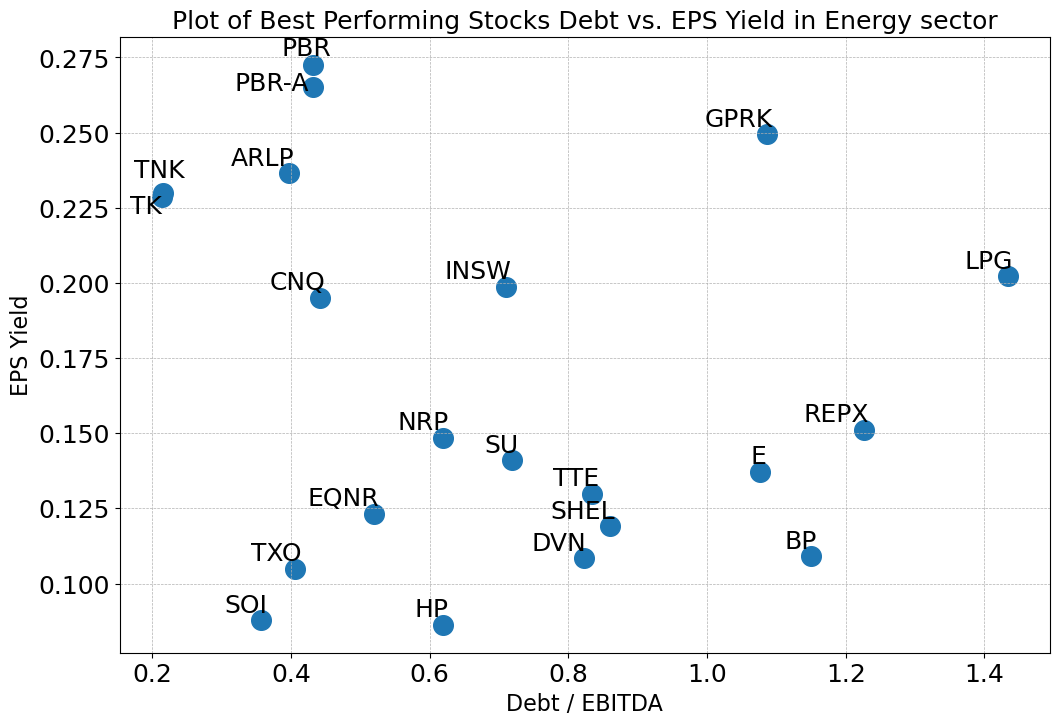

In [8]:
import matplotlib.pyplot as plt
from adjustText import adjust_text
plt.figure(figsize=(12, 8))
plt.xlabel('Debt / EBITDA',fontsize=16)
plt.ylabel('EPS Yield',fontsize=16)
plt.grid(which='both', linestyle='--', linewidth=0.5)
plt.tick_params(axis='both', which='major', labelsize=18)
scatter = plt.scatter(final_selection['Debt'], final_selection['EPS Yield'], s = 200) 

texts = []
for i, row in final_selection.iterrows():
    texts.append(plt.text(row['Debt'], row['EPS Yield'], row['Code'], fontsize=18, ha='right'))

adjust_text(texts)
sector_title = f'{sector} sector'
plt.title('Plot of Best Performing Stocks Debt vs. EPS Yield in ' + sector_title, fontsize=18)
plt.savefig('Best_Debt_EPS_fixed.png', bbox_inches='tight')
plt.show()

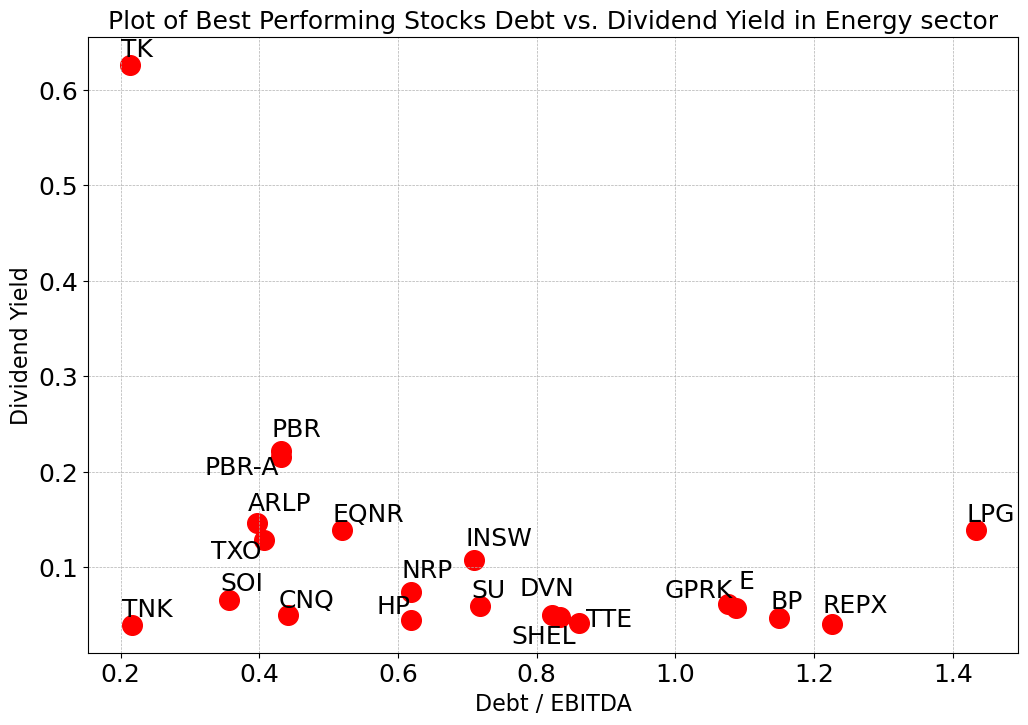

In [11]:
plt.figure(figsize=(12, 8))
plt.xlabel('Debt / EBITDA',fontsize=16)
plt.ylabel('Dividend Yield',fontsize=16)
plt.grid(which='both', linestyle='--', linewidth=0.5)
plt.tick_params(axis='both', which='major', labelsize=18)

plot_data = final_selection[final_selection['Code'] != 'AMTD']
scatter = plt.scatter(plot_data['Debt'], plot_data['Dividend Yield'], c='r',s=200) 

texts = []
for i, row in plot_data.iterrows():
    texts.append(plt.text(row['Debt'], row['Dividend Yield'], row['Code'], fontsize=18, ha='right'))
adjust_text(texts)

plt.title('Plot of Best Performing Stocks Debt vs. Dividend Yield in ' + sector_title, fontsize=18)
plt.savefig('Best_Debt_Div_fixed.png', bbox_inches='tight')
plt.show()

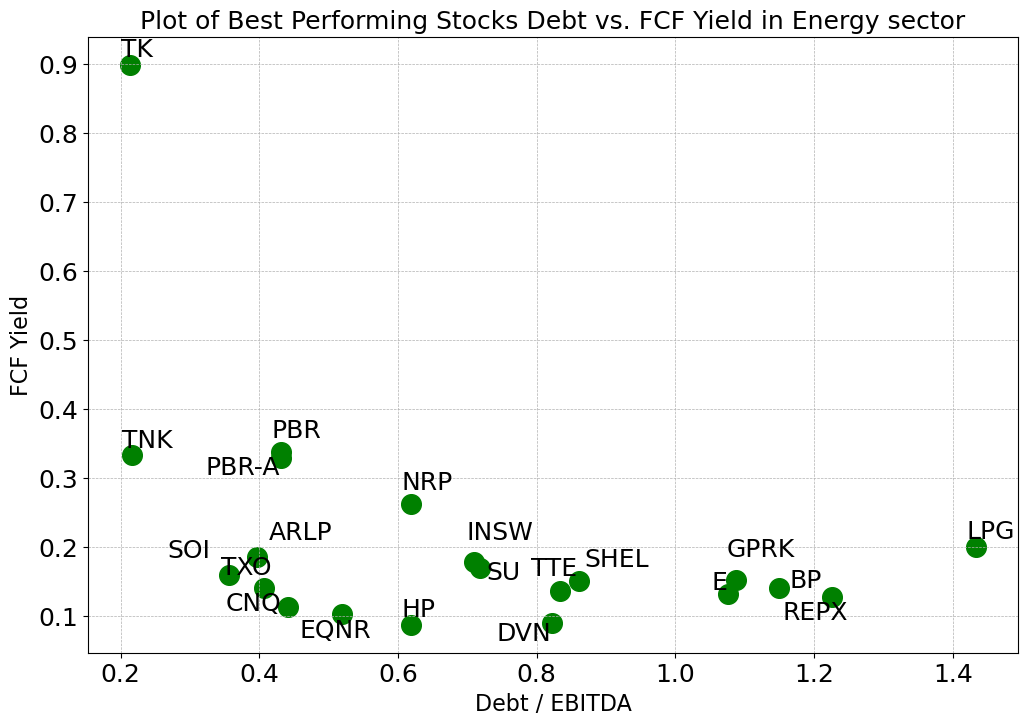

In [10]:
plt.figure(figsize=(12, 8))
plt.xlabel('Debt / EBITDA',fontsize=16)
plt.ylabel('FCF Yield',fontsize=16)
scatter = plt.scatter(plot_data['Debt'], plot_data['FCF'], c='g',s=200) 
plt.grid(which='both', linestyle='--', linewidth=0.5)
plt.tick_params(axis='both', which='major', labelsize=18)

texts = []
for i, row in plot_data.iterrows():
    texts.append(plt.text(row['Debt'], row['FCF'], row['Code'], fontsize=18, ha='right'))
adjust_text(texts)


plt.title('Plot of Best Performing Stocks Debt vs. FCF Yield in ' + sector_title , fontsize=18)
plt.savefig('Best_Debt_FCF_fixed.png', bbox_inches='tight')
plt.show()

In [21]:
today = '2024-06-03'
days_60 = '2024-04-04'
days_120 = '2024-02-05'
days_year = '2023-06-05'
def get_returns(stock,date,index='.US'):
    code = stock['General']['Code']
    price = float(api.get_eod_historical_stock_market_data(symbol=code + index, from_date=date, to_date=date)[0]['adjusted_close'])
    price_today = float(api.get_eod_historical_stock_market_data(symbol=code + index, from_date=today, to_date=today)[0]['adjusted_close'])
    returns = (price_today - price) / price
    return returns

In [22]:
def get_all_returns(stock,index='.US'):
    stock_returns = []
    stock_returns.append(get_returns(stock, days_60, index))
    stock_returns.append(get_returns(stock, days_120, index))
    stock_returns.append(get_returns(stock, days_year,index))
    return stock_returns

In [23]:
stocks_Best = []
for index, row in final_selection.iterrows():
    code = row['Code']
    print(code)
    stock = api.get_fundamentals_data(code)
    stocks_Best.append(stock)


TK
TNK
SOI
ARLP
TXO
PBR
PBR-A
CNQ
EQNR
HP
NRP
INSW
SU
DVN
TTE
LPG
GPRK
REPX
E
SHEL
BP


In [24]:
all_returns = []
for stock in stocks_Best:
    all_returns.append(get_all_returns(stock))


In [25]:
GSPC_returns = []

price_60 = float(api.get_eod_historical_stock_market_data(symbol='GSPC.INDX', from_date=days_60, to_date=days_60)[0]['adjusted_close'])
price_today = float(api.get_eod_historical_stock_market_data(symbol='GSPC.INDX', from_date=today, to_date=today)[0]['adjusted_close'])
price_120 = float(api.get_eod_historical_stock_market_data(symbol='GSPC.INDX', from_date=days_120, to_date=days_120)[0]['adjusted_close'])
price_year = float(api.get_eod_historical_stock_market_data(symbol='GSPC.INDX', from_date=days_year, to_date=days_year)[0]['adjusted_close'])
GSPC_returns.append((price_today - price_60) / price_60)
GSPC_returns.append((price_today - price_120) / price_120)
GSPC_returns.append((price_today - price_year) / price_year)
print(GSPC_returns)

[0.026458974862109824, 0.0689061066699691, 0.2362329220668307]


In [26]:
all_returns.append(GSPC_returns)

In [27]:
code_list = []
for stock in stocks_Best:
    code_list.append(stock['General']['Code'])
code_list.append('GSPC')

In [28]:
df_returns = pd.DataFrame(all_returns, columns=['60 Days', '120 Days', '1 Year'])
df_returns.insert(0, 'Code', code_list)
filename = f'returns_{sector}.csv'
df_returns.to_csv(filename, index=False)

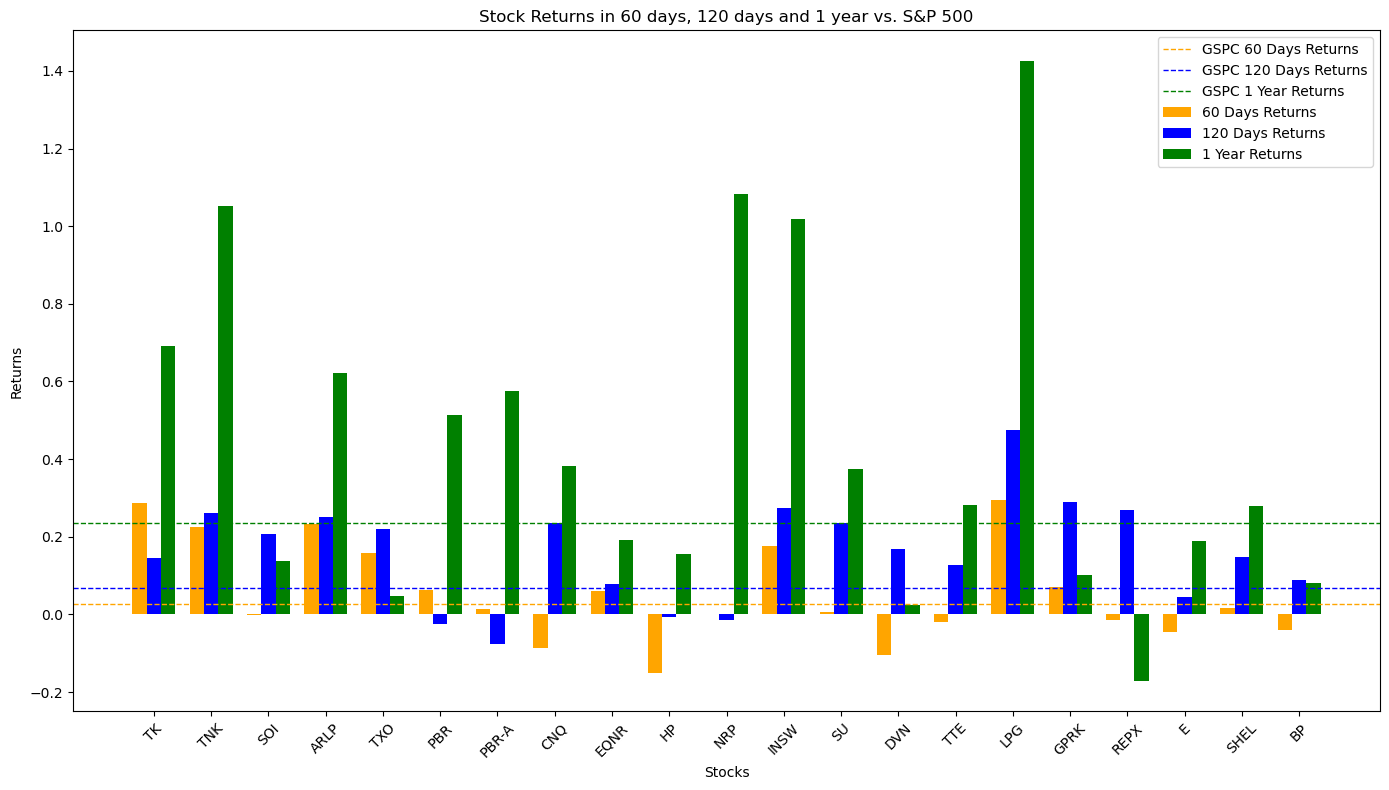

In [29]:
import numpy as np
import matplotlib.pyplot  as plt

plot_data = df_returns.iloc[:-1]

bar_width = 0.25  
index = np.arange(len(plot_data['Code'])) 

fig, ax = plt.subplots(figsize=(14, 8))

rects1 = ax.bar(index - bar_width, plot_data['60 Days'], bar_width, label='60 Days Returns', color = 'orange')
rects2 = ax.bar(index, plot_data['120 Days'], bar_width, label='120 Days Returns', color = 'blue')
rects3 = ax.bar(index + bar_width, plot_data['1 Year'], bar_width, label='1 Year Returns', color = 'green')

ax.axhline(y=GSPC_returns[0], color='orange', linestyle='--', linewidth=1, label='GSPC 60 Days Returns')
ax.axhline(y=GSPC_returns[1], color='blue', linestyle='--', linewidth=1, label='GSPC 120 Days Returns')
ax.axhline(y=GSPC_returns[2], color='green', linestyle='--', linewidth=1, label='GSPC 1 Year Returns')

ax.set_xlabel('Stocks')
ax.set_ylabel('Returns')
ax.set_title('Stock Returns in 60 days, 120 days and 1 year vs. S&P 500')
ax.set_xticks(index)
ax.set_xticklabels(plot_data['Code'], rotation=45) 
ax.legend() 

plt.tight_layout() 
plt.savefig('Returns.png')
plt.show()

In [30]:
size = plot_data['60 Days'].size
benefit_60_days = np.sum(plot_data['60 Days'])/size
benefit_120_days = np.sum(plot_data['120 Days'])/size
benefit_1_year = np.sum(plot_data['1 Year'])/size
benefit_GPSC_60 = GSPC_returns[0]
benefit_GPSC_120 = GSPC_returns[1]
benefit_GPSC_1_Y = GSPC_returns[2]
print(f"Return for Investing in Best-Stocks Portfolios in 60 days is {benefit_60_days * 100:.2f}%")
print(f"Return for Investing in S&P500 in 60 days is {benefit_GPSC_60 * 100:.2f}%")
print(f"Return for Investing in Best-Stocks Portfolios in 120 days is {benefit_120_days * 100:.2f}%")
print(f"Return for Investing in S&P500 in 120 days is {benefit_GPSC_120 * 100:.2f}%")
print(f"Return for Investing in Best-Stocks Portfolios in 1 year is {benefit_1_year * 100:.2f}%")
print(f"Return for Investing in S&P500 in 1 year is {benefit_GPSC_1_Y * 100:.2f}%")

Return for Investing in Best-Stocks Portfolios in 60 days is 5.47%
Return for Investing in S&P500 in 60 days is 2.65%
Return for Investing in Best-Stocks Portfolios in 120 days is 16.17%
Return for Investing in S&P500 in 120 days is 6.89%
Return for Investing in Best-Stocks Portfolios in 1 year is 43.15%
Return for Investing in S&P500 in 1 year is 23.62%


In [7]:
GSPC_List = pd.read_csv('../GSPC.csv')
date_list = GSPC_List['Date']
GSPC_returns = GSPC_List['Returns']
code_list = final_selection['Code']
print(code_list)

14        TK
15       TNK
20       SOI
21      ARLP
23       TXO
24       PBR
25     PBR-A
27       CNQ
30      EQNR
34        HP
35       NRP
41      INSW
42        SU
48       DVN
49       TTE
66       LPG
91      GPRK
97      REPX
100        E
120     SHEL
121       BP
Name: Code, dtype: object


In [8]:
error_list = []
def get_price_list(stock, time_list, initial_price):
    price_list = []
    error_list = []
    previous_price = initial_price
    previous_returns = 0 

    for date in time_list:
        try:
            price = float(api.get_eod_historical_stock_market_data(symbol=stock, from_date=date, to_date=date)[0]['adjusted_close'])
            returns = (price - initial_price) / initial_price
            price_list.append([date, price, returns])
            previous_price = price
            previous_returns = returns
        except Exception as e:
            error_list.append([stock, date])
            price_list.append([date, previous_price, previous_returns])
            print(f'{stock} on {date} error: {e}')
            continue
    
    return price_list, error_list

all_profolio = []

for s in code_list:
    try:
        initial_price = float(api.get_eod_historical_stock_market_data(symbol= s, from_date = date_list[0], to_date = date_list[0])[0]['adjusted_close'])
    except Exception as e:
        print(f'{s} cannot get initial price')
        initial_price = float(api.get_eod_historical_stock_market_data(symbol= s, from_date = date_list[1], to_date = date_list[1])[0]['adjusted_close'])
        continue
    stock_performance, error_list = get_price_list(s, date_list, initial_price)
    if error_list:
        print(error_list)
    returns = [sublist[2] for sublist in stock_performance]
    all_profolio.append(returns)

print(len(all_profolio))

21


In [9]:
import numpy as np
n = len(date_list)
sum = np.zeros(n) 
for i in all_profolio:
    returns = np.array(i)
    sum += returns
total = sum / len(all_profolio)
print(total)

[0.         0.02838133 0.04892083 0.04060482 0.06803262 0.06318535
 0.06677576 0.11587995 0.16637146 0.15731059 0.14857676 0.15420763
 0.15171751 0.17016548 0.16601259 0.20374202 0.20061767 0.17791853
 0.19630534 0.24076636 0.21285594 0.20505613 0.24264953 0.22172218
 0.24818404 0.23795546 0.22726574 0.18262786 0.23275816 0.27906557
 0.26193317 0.28158433 0.24279306 0.24579238 0.27520761 0.24157788
 0.2483409  0.2388303  0.24676238 0.24204569 0.26084242 0.27710287
 0.31044877 0.34048484 0.35494937 0.33263385 0.34482982 0.3812355
 0.36689321 0.39739719 0.42429628 0.4433963  0.43147373]


In [10]:
import json
listofcodes = [code for code in code_list.tolist() if code != 'KLG']
all_returns_dict = {listofcodes[i]: all_profolio[i] for i in range(len(all_profolio))}
all_returns_dict['Average'] = total.tolist()

with open('returns.json', 'w') as json_file:
    json.dump(all_returns_dict, json_file, indent=4)

In [11]:
import pandas as pd

df = pd.read_json('returns.json')
total = df['Average']
sector_title = sector + ' Sector'
std = np.std(total)
print(f'Standard Deviation of {sector_title} is: ', std)

Standard Deviation of Energy Sector is:  0.10321126554843556


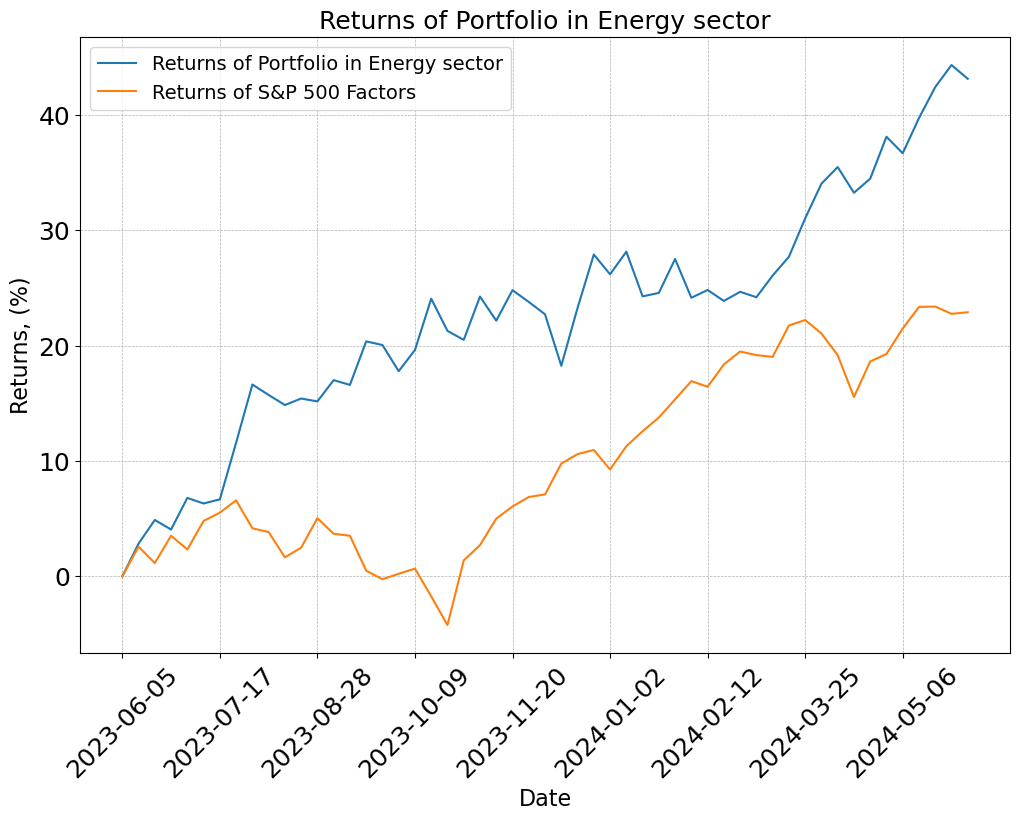

In [12]:
import matplotlib.pyplot as plt
weeks = range(len(date_list))
sector_title = f'{sector} sector'
plt.figure(figsize=(12, 8))
plt.xlabel('Date',fontsize=16)
plt.ylabel('Returns, (%)',fontsize=16)
plt.tick_params(axis='both', which='major', labelsize=18)
plt.grid(which='both', linestyle='--', linewidth=0.5)


plt.plot(date_list, total * 100, label = f'Returns of Portfolio in {sector_title}')
plt.plot(date_list, GSPC_returns*100, label = f'Returns of S&P 500 Factors')
plt.legend(fontsize=14)
plt.title('Returns of Portfolio in ' + sector_title , fontsize=18)

interval = 6 
plt.xticks(ticks=date_list[::interval], labels=date_list[::interval], rotation=45)
plt.savefig('Portfolio_Returns', bbox_inches='tight')
plt.show()